In [70]:
import random
import math

from typing import List, Tuple

# Лабораторная работа 2. Методы поиска

### Вариант: 8

## Алгоритм Ахо-Карасик

Другие названия:
- Алгоритм АС-автомата
- Алгоритм поиска подстроки в строке с помощью автомата

### Классификация алгоритма:
- По типу алгоритма: на основе построения детерминированного конечного автомата (DFA) для множества образцов (строк)
- По устойчивости: устойчивый
- По месту хранения данных: бор(tier), преффиксная ссылка(suffic link), дополнительная структура данных(стек, очередь)
- По выделению дополнительного пространства: массив fail и массив output для суффиксных ссылок
- По дополнительным затратам памяти: $O(NL)$ где N - кол-во слов, L - длина слов
- Время выполнения:
    - В лучшем случае: $O(n+m+z)$ где n - кол-во шаблонов, m - длина текста, z - общее кол-во совпадений шаблонов в тексте
    - В худшем случае: $O(nm)$
    - В среднем: $O(n+m+z)$

### Описание алгоритма:

Основная идея алгоритма Ахо-Карасика состоит в том, чтобы создать бор ключевых слов из всех шаблонов, которые нужно найти в тексте, и использовать его для эффективного поиска всех шаблонов в тексте.

Алгоритм состоит из двух этапов:
1. Построение бора ключевых слов:
- Создать корневой узел бора.
- Для каждого шаблона вставить его символы в бор, начиная с корневого узла и двигаясь вниз по дереву в соответствии с символами шаблона.
- Для каждого узла в боре, кроме корневого, найти его суффиксную ссылку, которая указывает на ближайший узел, являющийся суффиксом данного узла и имеющий тот же символ, что и данный узел. Это позволяет быстро переходить к следующему совпадению шаблона в тексте, если текущее совпадение не было найдено.
- Для каждого узла в боре, кроме корневого, найти его ссылку на вывод, которая указывает на ближайший узел, являющийся префиксом данного узла и имеющий метку, соответствующую шаблону. Это позволяет быстро определять, какой шаблон был найден в тексте.
2. Поиск паттернов в тексте:
- Начать поиск в тексте с корневого узла дерева ключевых слов.
- Для каждого символа в тексте перейти к следующему узлу дерева ключевых слов, который соответствует этому символу.
- Если текущий узел имеет выходную ссылку, добавить соответствующий паттерн в список найденных паттернов.
- Если текущий узел имеет суффиксную ссылку, перейти к следующему совпадению шаблонов в тексте, начиная с узла, на который указывает суффиксная ссылка.
- Повторять этот процесс до тех пор, пока не будут перебраны все символы в тексте.

### Блок-схема алгоритма

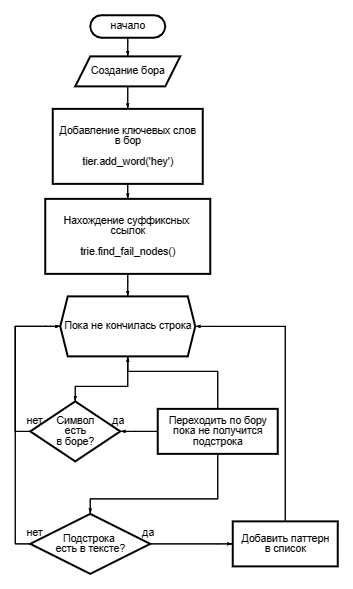

In [71]:
from IPython.display import Image
Image(filename = 'img/popo.png')

### Псевдо-код алгоритма (Код на языке С++)

In [72]:
'''
class BorNode;
typedef map<const char, BorNode *> LinksMap;

class BorNode {
public:<br>
    LinksMap links;
    BorNode *fail;
    BorNode *term;
    int out;

public:<br>
    BorNode(BorNode *fail_node = NULL) : fail(fail_node), term(NULL), out(-1) { }

    BorNode* getLink(const char c) const {
        LinksMap::const_iterator iter = links.find(c);
        if (iter != links.cend()) {
            return iter->second;
        }
        else {
            return nullptr;
        }
    }

    bool isTerminal() const {
        return (out >= 0);
    }
};

class AhoCorasick {
public:<br>
    typedef void (*Callback) (const char* substr);
    BorNode root;
    vector<string> words;
    BorNode* current_state;

public:
    void addString(const char* const str) {
        BorNode *current_node = &root;
        for(const char *cp = str; *cp; ++cp) {
            BorNode *child_node = current_node->getLink(*cp);
            if (!child_node) {
                child_node = new BorNode(&root);
                current_node->links[*cp] = child_node;
            }
            current_node = child_node;
        }
        current_node->out = words.size();
        words.push_back(str);
    }

    void init() {
        queue<BorNode *> q;
        q.push(&root);
        while (!q.empty()) {
            BorNode *current_node = q.front();
            q.pop();
            for (LinksMap::const_iterator iter = current_node->links.cbegin(); iter != current_node->links.cend(); ++iter) {
                const char symbol = iter->first;
                BorNode *child = iter->second;
                BorNode *temp_node = current_node->fail;
                while (temp_node) {
                    BorNode *fail_candidate = temp_node->getLink(symbol);
                    if (fail_candidate) {
                        child->fail = fail_candidate;
                        break;
                    }
                    temp_node = temp_node->fail;
                }
                    if (child->fail->isTerminal()) {
                        child->term = child->fail;
                    }
                    else {
                        child->term = child->fail->term;
                    }
                q.push(child);
            }
        }
    }

    void step(const char c) {
        while (current_state) {
            BorNode *candidate = current_state->getLink(c);
            if (candidate) {
                current_state = candidate;
                return;
            }
            current_state = current_state->fail;
        }
        current_state = &root;
    }

    void printTermsForCurrentState(Callback callback) const {
        if (current_state->isTerminal()) {
            callback(words[current_state->out].c_str());
        }
        BorNode *temp_node = current_state->term;
        while (temp_node) {
            callback(words[temp_node->out].c_str()); 
            temp_node = temp_node->term;
        }
    }

    void search(const char* str, Callback callback) {
        current_state = &root;
        for(; *str; ++str) {
            cout << *str << ':' << endl;
            step(*str);
            printTermsForCurrentState(callback);
         }
    }
};
'''

"\nclass BorNode;\ntypedef map<const char, BorNode *> LinksMap;\n\nclass BorNode {\npublic:<br>\n    LinksMap links;\n    BorNode *fail;\n    BorNode *term;\n    int out;\n\npublic:<br>\n    BorNode(BorNode *fail_node = NULL) : fail(fail_node), term(NULL), out(-1) { }\n\n    BorNode* getLink(const char c) const {\n        LinksMap::const_iterator iter = links.find(c);\n        if (iter != links.cend()) {\n            return iter->second;\n        }\n        else {\n            return nullptr;\n        }\n    }\n\n    bool isTerminal() const {\n        return (out >= 0);\n    }\n};\n\nclass AhoCorasick {\npublic:<br>\n    typedef void (*Callback) (const char* substr);\n    BorNode root;\n    vector<string> words;\n    BorNode* current_state;\n\npublic:\n    void addString(const char* const str) {\n        BorNode *current_node = &root;\n        for(const char *cp = str; *cp; ++cp) {\n            BorNode *child_node = current_node->getLink(*cp);\n            if (!child_node) {\n         

### Реализация алгоритма

Достоинства алгоритма:
- Эффективность
- Возможность поиска всех совпадений
- Гибкость
- Масштабируемость

Недостатки алгоритма:
- Неэффективность для одного паттерна
- Потребление памяти
- Сложность реализации
- Неэффективность при изменении паттерна

In [73]:
### Реализация алгоритма|

# Класс узла дерева
class Node:
    def __init__(self, char):
        self.char = char
        self.children = {}
        self.fail_node = None
        self.word_endings = []

# Алгоритм Ахо-Корасик
class AhoCorasick:
    def __init__(self):
        self.root = Node(None)
    
    # Добавление нового слова в дерево
    def add_word(self, word):
        node = self.root
        for char in word:
            if char in node.children:
                node = node.children[char]
            else:
                new_node = Node(char)
                node.children[char] = new_node
                node = new_node
        node.word_endings.append(word)
        
    # Нахождение связей fail_node
    def find_fail_nodes(self):
        queue = []
        for child in self.root.children.values():
            queue.append(child)
            child.fail_node = self.root
        
        while queue:
            curr_node = queue.pop(0)
            for char, child_node in curr_node.children.items():
                queue.append(child_node)
                fail_node = curr_node.fail_node
                
                while fail_node and char not in fail_node.children:
                    fail_node = fail_node.fail_node
                child_node.fail_node = fail_node.children[char] if fail_node else self.root
                child_node.word_endings += child_node.fail_node.word_endings
            
    # Поиск вхождений шаблонов в тексте
    def search(self, text) -> int:
        count = 0
        results = {}
        results['Total number of occurrences'] = []
        curr_node = self.root
        
        for i, char in enumerate(text):
            while curr_node and char not in curr_node.children:
                curr_node = curr_node.fail_node
                
            if not curr_node:
                curr_node = self.root
                continue
                
            curr_node = curr_node.children[char]
            
            for word in curr_node.word_endings:
                if word not in results:
                    results[word] = []
                results[word].append(i - len(word) + 1)
                count = count + 1
        
        results['Total number of occurrences'].append(count)
        
        return results

In [74]:
### Тестирование программы

ac = AhoCorasick()
ac.add_word("hey")
ac.add_word("there")
ac.find_fail_nodes()

text = "hey there hey hello there"
results = ac.search(text)

assert(results['Total number of occurrences'] == [4])
print(results)

{'Total number of occurrences': [4], 'hey': [0, 10], 'there': [4, 20]}


In [75]:
ac = AhoCorasick()
ac.add_word("animals")
ac.find_fail_nodes()
s = {}

with open('Files/Words.txt', 'r', encoding='utf-8') as f:
    s = f.read()

results = ac.search(s)

assert(results['Total number of occurrences'] == [8])

In [76]:
### Тестирование на книге Гадкий Утенок

ac = AhoCorasick()
ac.add_word("ugly")
ac.add_word("duckling")
ac.find_fail_nodes()
s = {}

with open('Files/The-Ugly-Duckling.txt', 'r', encoding='utf-8') as f:
    s = f.read()

results = ac.search(s)

assert(results['Total number of occurrences'] == [49])

# ---------------------------------------------------------------------------------------------------------------

## Метод золотого сечения

### Классификация алгоритма:
- По типу алгоритма: алгоритм поиска с использованием деления интервала и принципа золотого сечения
- По устойчивости: устойчивый
- По месту хранения данных: на месте
- По выделению дополнительного пространства: не выделяет дополнительного пространства
- По дополнительным затратам памяти: $O(1)$
- Время выполнения:
    - В лучшем случае: $O(1)$ в начале интервала
    - В худшем случае: $O(log(phi, epsilon))$ phi - золотое сечени, epsilon - желаемый уровень точности
    - В среднем: Трудно определить, поскольку зависит от распределения минимумов и максимумов функции на интервале

### Описание алгоритма:

Метод золотого сечения - это алгоритм численной оптимизации, используемый для нахождения минимума или максимума унимодальной функции в заданном интервале. Он работает путем деления интервала на две части на основе золотого сечения, которое составляет приблизительно 1,618.

На каждой итерации алгоритма выбираются две точки в интервале на основе золотого сечения, и функция оценивается в этих точках. Затем интервал обновляется, чтобы исключить точку, которая дает большее значение функции, и процесс повторяется до тех пор, пока интервал не станет достаточно маленьким или не будет достигнут желаемый уровень точности.

Преимущество метода золотого сечения в том, что он относительно прост в реализации и требует только оценки функции, что делает его подходящим для ситуаций, когда оценка функции требует больших вычислительных затрат или когда функция не может быть дифференцирована. Однако он может быть медленнее, чем другие методы оптимизации, особенно когда количество итераций, необходимых для достижения желаемой точности, велико.

### Блок-схема алгоритма

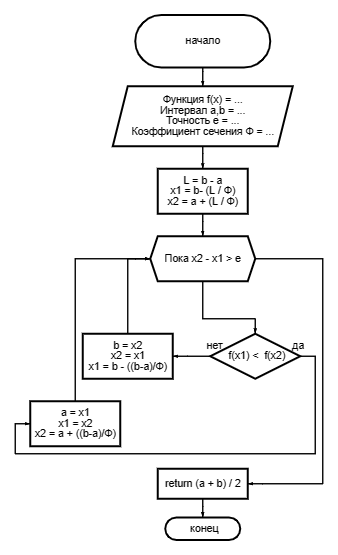

In [81]:
Image(filename = 'img/golden.png')

### Псевдо-код алгоритма (Код на языке С++)

In [77]:
'''
#include <iostream>
#include <cmath>

double goldenRatioMethod(double (*f)(double), double a, double b, double epsilon) {
    const double phi = (1 + std::sqrt(5)) / 2; // golden ratio
    double c = b - (b - a) / phi;
    double d = a + (b - a) / phi;
    while (std::abs(b - a) > epsilon) {
        if (f(c) < f(d)) {
            b = d;
            d = c;
            c = b - (b - a) / phi;
        } else {
            a = c;
            c = d;
            d = a + (b - a) / phi;
        }
    }
    return (a + b) / 2;
}

double f(double x) {
    return std::pow(x, 2) - 4 * x + 5;
}
'''

'\n#include <iostream>\n#include <cmath>\n\ndouble goldenRatioMethod(double (*f)(double), double a, double b, double epsilon) {\n    const double phi = (1 + std::sqrt(5)) / 2; // golden ratio\n    double c = b - (b - a) / phi;\n    double d = a + (b - a) / phi;\n    while (std::abs(b - a) > epsilon) {\n        if (f(c) < f(d)) {\n            b = d;\n            d = c;\n            c = b - (b - a) / phi;\n        } else {\n            a = c;\n            c = d;\n            d = a + (b - a) / phi;\n        }\n    }\n    return (a + b) / 2;\n}\n\ndouble f(double x) {\n    return std::pow(x, 2) - 4 * x + 5;\n}\n'

### Реализация алгоритма

Преимущества метода золотого сечения:
- Гарантированная сходимость: Метод золотого сечения гарантированно сходится к минимуму унимодальной функции в заданном интервале, при условии, что функция непрерывна, а интервал хорошо определен.
- Требуется только оценка функций: Алгоритм требует оценки функции только в двух точках на каждой итерации, что делает его подходящим для ситуаций, когда функция не может быть дифференцирована или когда стоимость оценки функции высока.
- Простота реализации: Алгоритм относительно прост в реализации, требуя только базовых арифметических операций и оценки функций.
- Подходит для узких интервалов: Метод золотого сечения особенно эффективен, когда исходный интервал узкий и когда минимум расположен вблизи одной из конечных точек интервала.

Недостатки метода золотого сечения:
- Медленная сходимость: Алгоритм может быть медленнее, чем другие методы оптимизации, особенно когда количество итераций, необходимых для достижения желаемого уровня точности, велико.
- Работает только для унимодальных функций: Метод золотого сечения можно использовать только для нахождения минимума унимодальной функции, то есть функции с единственным локальным минимумом.
- Интервал должен быть четко определен: Алгоритм требует начального интервала, который содержит минимум функции, и минимум должен быть расположен внутри интервала. Если интервал плохо определен или минимум находится вне интервала, алгоритм может не сходиться или сходиться к неоптимальной точке.
- Чувствительность к начальному интервалу: Производительность алгоритма может быть чувствительна к выбору начального интервала, и выбор плохого начального интервала может привести к медленной сходимости или не сходимости.

In [78]:
def golden_section_search(f, a, b, epsilon=0.0001):
    func = lambda x: f(x)
    
    golden_ratio = (1 + 5 ** 0.5) / 2
    
    #Текущий размер поиска
    L = b - a
    
    # Первая точка на отрезке
    x1 = b - (b - a) / golden_ratio
    
    # Вторая точка на отрезке
    x2 = a + (b - a) / golden_ratio
    
    # Значение функции в первой точке разбиения
    f1 = func(x1)
    # Значение функции во второй точке разбиения
    f2 = func(x2)
    
    # Пока расстояние между точками разбиения не меньше точности eps
    while abs(x2 - x1) >= epsilon:
        # Если во второй точке разбиения функция больше
        if f1 < f2:
            # Меняем интервал поиска, откидывая самую правую часть
            b = x2
            x2 = x1
            x1 = b - (b - a) / golden_ratio
            f2 = f1
            f1 = f(x1)
        else:
            # Меняем интервал поиска, откидывая самую левую часть
            a = x1
            x1 = x2
            x2 = a + (b - a) / golden_ratio
            f1 = f2
            f2 = f(x2)
            
    return (a + b) / 2

In [79]:
def f(x):
    return 12 * x**3 + 12 * x**2

x_min = golden_section_search(f, -0.5, 1, 0.0001)

f_neg = lambda x: -f(x)

x_max = golden_section_search(f_neg, -1, -0.1, 0.0001)

print("Minimum of f(x) at x =", x_min)
print("Maximum of f(x) at x =", x_max)

Minimum of f(x) at x = -1.652674033793898e-05
Maximum of f(x) at x = -0.6665471015029412
